1. consider experimental nuclear masses in the file BEperNucleon.txt

In [1]:
import numpy as np
import csv
import numpy as np
# curve-fit() function imported from scipy
from scipy.optimize import curve_fit, minimize
 
from matplotlib import pyplot as plt

In [2]:

BEN = np.genfromtxt("BEperNucleon.txt", unpack = True, skip_header= 0)



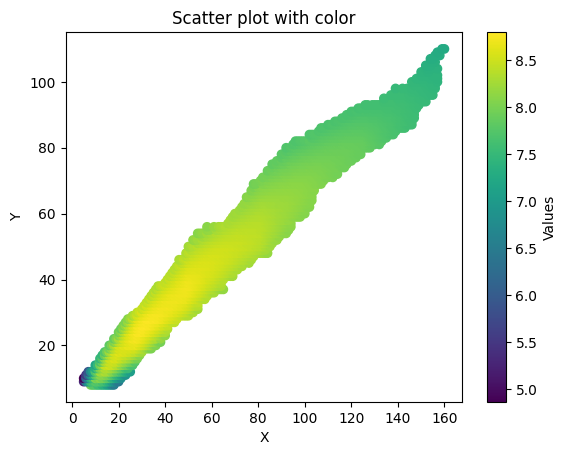

In [3]:
import matplotlib.pyplot as plt

# Sample data
x = BEN[0]
y = BEN[1]
values = BEN[2]  # Values to represent by color

Nuc_info = (x,y)

plt.scatter(x, y, c=values, cmap='viridis')  # Use 'viridis' colormap for colors
plt.colorbar(label='Values')  # Add colorbar to show the scale
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot with color')

plt.show()

Take the LDM mass expression

\begin{equation}
B = a_{vol} \  A - a_{surf} \ A^{2/3} - a_{sym}  \ \frac{ ( N - Z)^2}{A} - a_c \ \frac{Z^2}{A^{1/3}} - \delta (A)
\end{equation}

wher $\delta (A)$ is 0 for even-even nuclei, $\frac{-a_p}{\sqrt{A}}$ for odd - A nuclei, 

In [4]:
3 

3

## U3 se chi-square approach to determine LDM parameters

In [32]:



def B(N, Z,a_vol, a_surf, a_sym, a_c, a_p):
    A = N + Z

    arg1 = a_vol * A
    arg2 = -a_surf * (A**(2/3))
    arg3 = -a_sym *(1/A) *(N - Z)**2
    arg4 = -a_c * (Z**2)/(A**(1/3))

    if  N % 2 == 0 and Z % 2 == 0: 
        arg5 = 0
    
    if  N % 2 != 0 and Z % 2 != 0:
        arg5 = - 2* a_p / np.sqrt(A)

    else:
        arg5 = - a_p/ np.sqrt(A)


    return  arg1 + arg2 + arg3 + arg4 - arg5

#Curve fits
#popt, pcov = curve_fit(B, Nuc_info, values)

#print(popt)
#print(pcov)

In [37]:
parm = [1,1,1,1,1]

def chi_2(param):
    a_vol, a_surf, a_sym, a_c, a_p = param 

    B_theory = []

    for i in range(len(BEN[0])):
        test_value = B(  BEN[0][i], BEN[1][i] ,a_vol, a_surf, a_sym, a_c, a_p  )
        B_theory.append(test_value)

    return np.sum ((B_theory - BEN[2])**2 )


result = minimize(chi_2,  parm)

print(result)

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 432.4066356959408
        x: [-3.007e-01 -1.526e+00 -4.094e-01 -1.103e-02  3.281e+00]
      nit: 9
      jac: [ 3.344e-02 -3.094e-02  8.298e-02  5.431e-02  2.639e-02]
 hess_inv: [[ 4.656e-05  1.586e-04 ...  2.884e-06  1.250e-03]
            [ 1.586e-04  5.512e-04 ...  9.561e-06  4.842e-03]
            ...
            [ 2.884e-06  9.561e-06 ...  1.860e-07  6.532e-05]
            [ 1.250e-03  4.842e-03 ...  6.532e-05  8.252e-02]]
     nfev: 348
     njev: 56


Text(0.5, 1.0, 'Scatter plot with color')

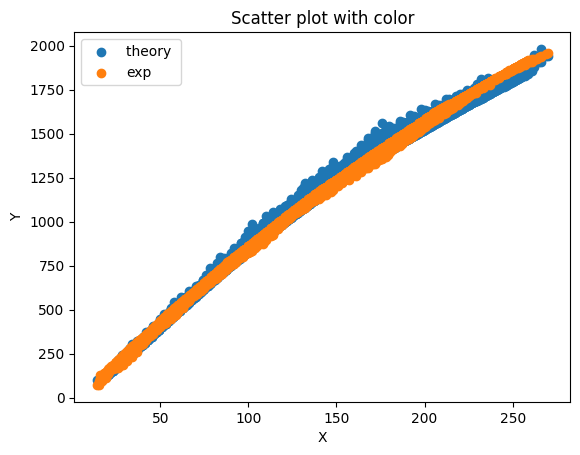

In [34]:
a_vol, a_surf, a_sym, a_c, a_p = result.x

B_theory = []

for i in range(len(BEN[0])):
    test_value = B(  BEN[0][i], BEN[1][i] ,a_vol, a_surf, a_sym, a_c, a_p  )
    B_theory.append(test_value)


plt.scatter( BEN[0] + BEN[1],B_theory* (BEN[0] + BEN[1]) , label = "theory " )  # Use 'viridis' colormap for colors
plt.scatter(BEN[0] + BEN[1], BEN[2]* (BEN[0] + BEN[1]) , label = "exp" )
#plt.colorbar(label='Values')  # Add colorbar to show the scale
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Scatter plot with color')  

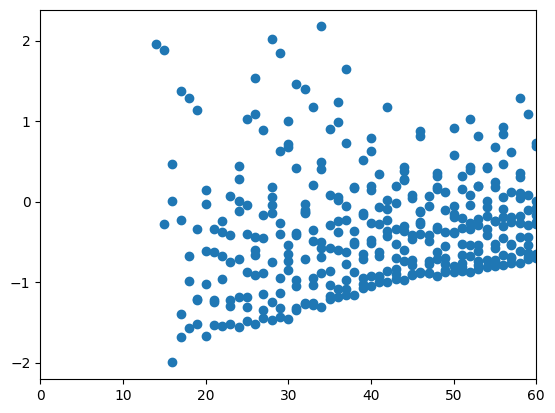

In [35]:
plt.scatter( BEN[0] + BEN[1], (B_theory - BEN[2]) , label = "theory " )  # Use 'viridis' colormap for colors
plt.xlim(0,60)
plt.show()

## 4 Compute the Hessian and covariance matrices

In [40]:
print("Hessian")
print((result.hess_inv)**-1 * 1/2)

print("Covarance Matrix")
N_d = len(BEN[0])

print(N_d)
N_p = 5

s = result.fun/(N_d - N_p)

print(result.hess_inv * s ) 

Hessian
[[1.07377530e+04 3.15332896e+03 5.10888907e+03 1.73370430e+05
  4.00127035e+02]
 [3.15332896e+03 9.07139616e+02 1.53044447e+03 5.22967058e+04
  1.03258633e+02]
 [5.10888907e+03 1.53044447e+03 2.09169104e+03 8.26800620e+04
  2.13408369e+02]
 [1.73370430e+05 5.22967058e+04 8.26800620e+04 2.68769010e+06
  7.65468004e+03]
 [4.00127035e+02 1.03258633e+02 2.13408369e+02 7.65468004e+03
  6.05898333e+00]]
Covarance Matrix
2466
[[8.18158283e-06 2.78600224e-05 1.71958745e-05 5.06728948e-07
  2.19559809e-04]
 [2.78600224e-05 9.68448670e-05 5.74028114e-05 1.67987284e-06
  8.50793901e-04]
 [1.71958745e-05 5.74028114e-05 4.20003785e-05 1.06255140e-06
  4.11660593e-04]
 [5.06728948e-07 1.67987284e-06 1.06255140e-06 3.26867355e-08
  1.14768762e-05]
 [2.19559809e-04 8.50793901e-04 4.11660593e-04 1.14768762e-05
  1.44994318e-02]]


## 5 Compute the matrix of correlations between LDM parameters

## 6 What is the effective number of LDM parameters?

## 7 Will the result be the same if the model is calibrated to the binding energy per nucleon B/A

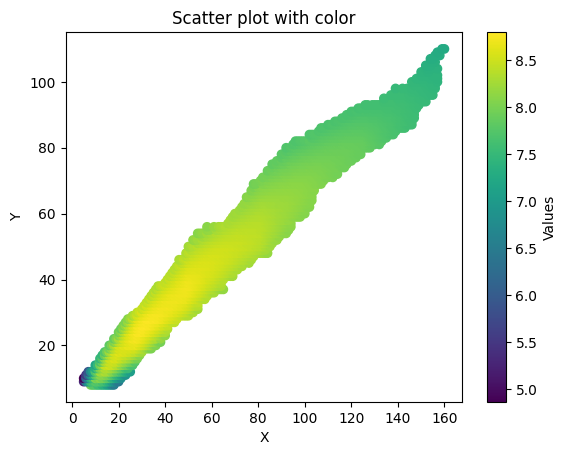

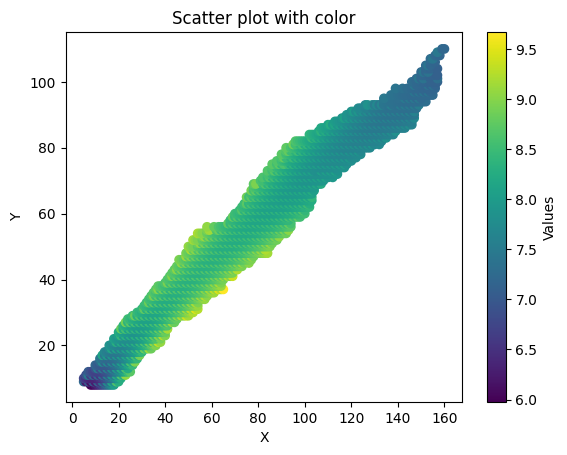

In [14]:
plt.scatter(x, y, c=values, cmap='viridis')  # Use 'viridis' colormap for colors
plt.colorbar(label='Values')  # Add colorbar to show the scale
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot with color')

plt.show()
plt.scatter(x, y, c=B_theory, cmap='viridis')  # Use 'viridis' colormap for colors
plt.colorbar(label='Values')  # Add colorbar to show the scale
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot with color')

plt.show()